In [23]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model, clone_model

# Load six Keras models
model_1 = load_model("model_David.keras")
model_2 = load_model("model_Vivi.keras")
model_3 = load_model("model_Cyn.keras")
model_4 = load_model("model_Yuu.keras")
model_5 = load_model("model_Luis.keras")
model_6 = load_model("model_Kev.keras")

# Ensure all models have identical architectures
assert all(len(model.get_weights()) == len(model_1.get_weights()) for model in [model_2, model_3, model_4, model_5, model_6]), "Models must have the same architecture!"

# Merge weights layer by layer (averaging)
merged_weights = [
    np.mean([model.get_weights()[layer_idx] for model in [model_1, model_2, model_3, model_4, model_5, model_6]], axis=0)
    for layer_idx in range(len(model_1.get_weights()))
]

# Create a new model with the same architecture
merged_model = clone_model(model_1)
merged_model.set_weights(merged_weights)

# Save the merged model
merged_model.save("merged_model.keras")
print("Successfully merged six models into merged_model.keras!")

Successfully merged six models into merged_model.keras!


In [24]:
import numpy as np

X_test = np.loadtxt('x_test_fed.csv', delimiter=',')
y_test = np.loadtxt('y_test_fed.csv', delimiter=',')

n_samples = X_test.shape[0]
height, width = 28, 28

X_test = X_test.reshape(n_samples, height, width)

In [25]:
import tensorflow as tf
from tensorflow.keras.models import load_model

# Load the merged model
model = load_model("merged_model.keras")

In [26]:
import numpy as np

# Predict class probabilities
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert softmax outputs to class labels

# Compare with true labels
print("Sample Predictions:")
for i in range(5):  # Display 5 samples
    print(f"Predicted: {y_pred_classes[i]}, Actual: {y_test[i]}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Sample Predictions:
Predicted: 1, Actual: 7.0
Predicted: 2, Actual: 2.0
Predicted: 1, Actual: 1.0
Predicted: 8, Actual: 0.0
Predicted: 4, Actual: 4.0


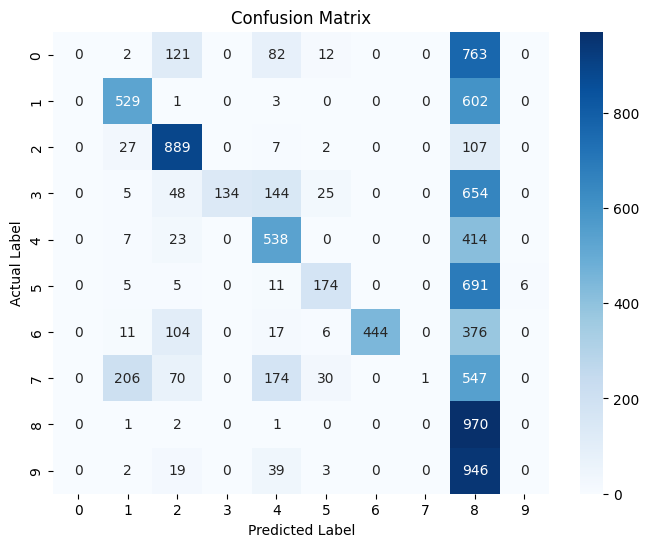

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)

# Plot
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Confusion Matrix")
plt.show()

In [28]:
from sklearn.metrics import classification_report

print("Classification Report:")
print(classification_report(y_test, y_pred_classes))

Classification Report:
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       980
         1.0       0.67      0.47      0.55      1135
         2.0       0.69      0.86      0.77      1032
         3.0       1.00      0.13      0.23      1010
         4.0       0.53      0.55      0.54       982
         5.0       0.69      0.20      0.30       892
         6.0       1.00      0.46      0.63       958
         7.0       1.00      0.00      0.00      1028
         8.0       0.16      1.00      0.28       974
         9.0       0.00      0.00      0.00      1009

    accuracy                           0.37     10000
   macro avg       0.57      0.37      0.33     10000
weighted avg       0.58      0.37      0.33     10000



d:\Program Files (x86)\Python 3.11.0\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\Program Files (x86)\Python 3.11.0\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\Program Files (x86)\Python 3.11.0\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
